In [1]:
import sys
sys.path.append('../')
import os
from smodels.theory.exceptions import SModelSTheoryError as SModelSError
from smodels.tools.smodelsLogging import logger
from smodels.experiment.databaseObj import Database
from smodels.experiment.txnameObj import TxName,TxNameData
from smodels.experiment.infoObj import Info
from smodels.experiment.defaultFinalStates import finalStates
from smodels.theory.auxiliaryFunctions import bracketToProcessStr, elementsInStr
from smodels.theory.element import Element
from smodels.theory.tree import InclusiveParticleNode
from smodels.particlesLoader import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.theory.model import Model
from smodels.tools.physicsUnits import fb, GeV
# logger.setLevel('DEBUG')

In [2]:
db = Database(os.path.abspath('../test/database'))
print(db)

Database version: unittest220
------------------------------
15 experimental results: 8 CMS, 7 ATLAS, 7 @ 8 TeV, 8 @ 13 TeV
124 datasets, 550 txnames.



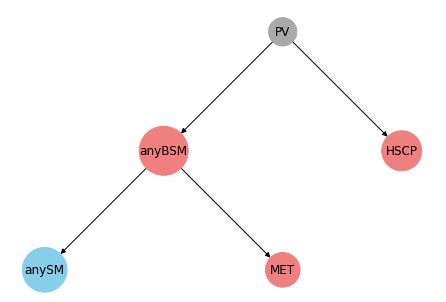

1101101000


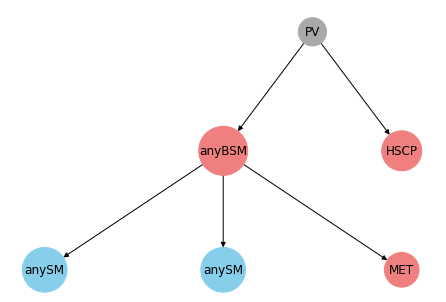

110110101000


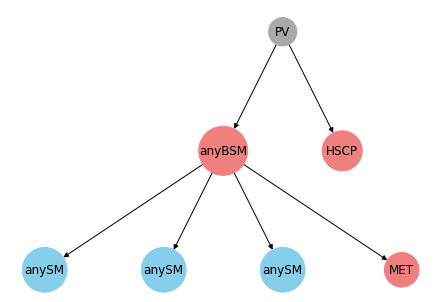

11011010101000


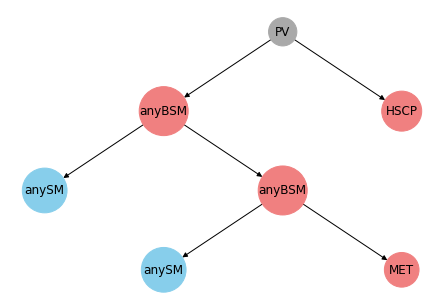

11011011010000


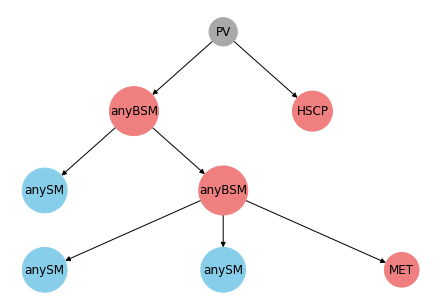

1101101101010000


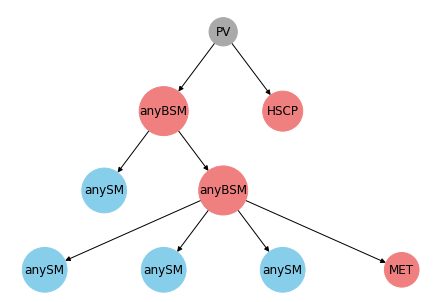

110110110101010000


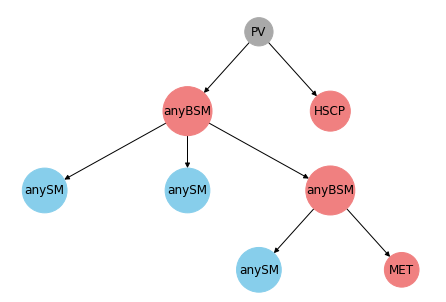

1101101011010000


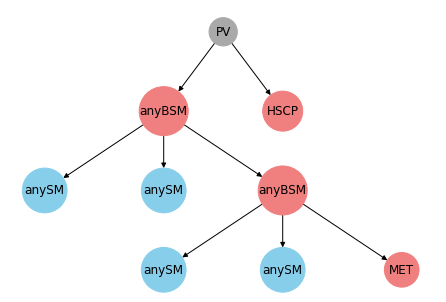

110110101101010000


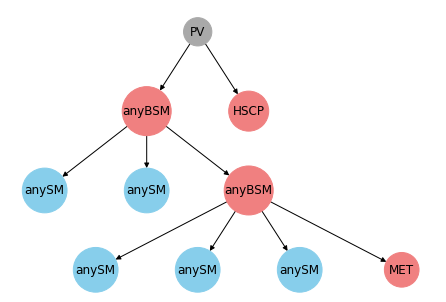

11011010110101010000


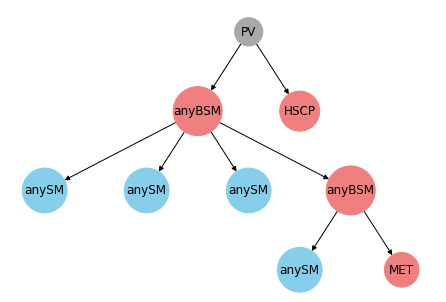

110110101011010000


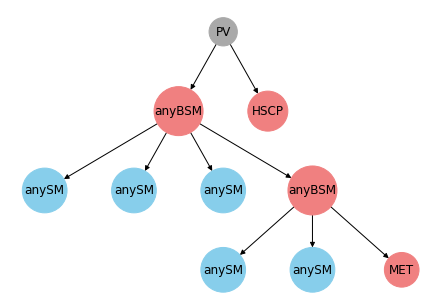

11011010101101010000


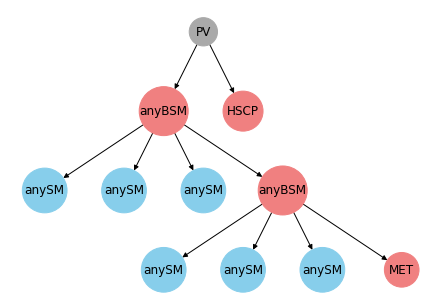

1101101010110101010000


In [3]:
exp = db.getExpResults(analysisIDs='CMS-PAS-EXO-16-036', txnames='THSCPM2')[0]
tx = exp.getTxNames()[0]
for el in tx._topologyDict.getElements():
    el.drawTree()
    print(el.canonName)

In [4]:
elA = '(PV > gluino(1),sta_1), (gluino(1) > u,u~,N2(3)), (N2(3) > W-,sta_1~(4)), (sta_1~(4) > W+,N1)'
slhafile="../inputFiles/slha/longLived.slha"
model = Model(BSMList,SMList)
model.updateParticles(inputFile=slhafile,promptWidth = 1e-12*GeV)
el = Element(elA,model=model)

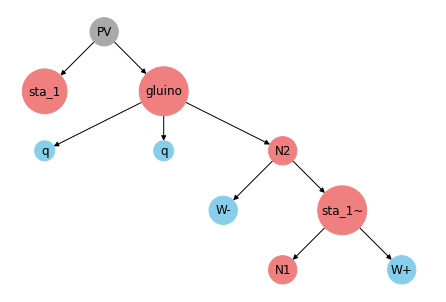

[PV, sta_1, gluino, q, q, N2, W-, sta_1~, N1, W+]
[(PV, sta_1), (PV, gluino), (gluino, q), (gluino, q), (gluino, N2), (N2, W-), (N2, sta_1~), (sta_1~, N1), (sta_1~, W+)]


In [5]:
el.drawTree()
print(el.tree.nodes)
print(el.tree.edges)

In [6]:
tx.hasElementAs(el)

False

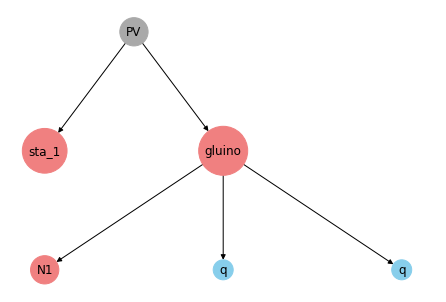

In [7]:
elA = '(PV > sta_1,gluino(1)), (gluino(1) > u,u~,N1)'
el = Element(elA,model=model)
el.drawTree()

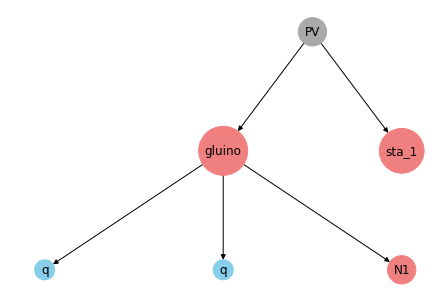

[PV, gluino, sta_1, q, q, N1]
[(PV, gluino), (PV, sta_1), (gluino, q), (gluino, q), (gluino, N1)]


In [8]:
matchedEl = tx.hasElementAs(el)
matchedEl.drawTree()
print(matchedEl.tree.nodes)
print(matchedEl.tree.edges)

In [9]:
elA = '(PV > sta_1,gluino(1)), (gluino(1) > u,u~,N2(2)), (N2(2) > Z, N1)'
el = Element(elA,model=model)
tx.hasElementAs(el)

(PV > gluino(1),sta_1), (gluino(1) > q,q,N2(2)), (N2(2) > Z,N1)

In [10]:
elA = '(PV > sta_1,gluino(1)), (gluino(1) > u,u~,N2(2)), (N2(2) > W-, sta_1)'
el = Element(elA,model=model)
tx.hasElementAs(el)

False

In [11]:
elA = '(PV > sta_1,sta_1)'
el = Element(elA,model=model)
tx.hasElementAs(el)

False